### Treść zadania

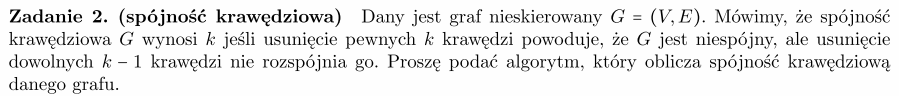

### Ogólne omówienie

W skrócie min-cut = max-flow. Jedną rzecz trzeba dopowiedzieć. Musimy w grafie przypisać każdej z krawędzi wagę równą 1. Wówczas waga minimalnego przecięcia (równa maksymalnemu przepływowi) będzie równa liczbie krawędzi (bo każda krawędź ma wagę 1, więc ich suma wag będzie równa ich liczbie).

###### Poniżej dokładne wyjaśnienie, czym jest min-cut
https://youtu.be/oHy3ddI9X3o?t=1062

# Sposób I
### (Wolniejszy)

### Omówienie algorytmu

Idea jest taka, że dla każdej pary różnych wierzchołków (ponieważ graf jest nieskierowany, to dla $ s = u, t = v $ oraz dla $ s = v, t = u $ otrzymamy te same rozwiązania, więc bierzmey tylko takie pary wierzchołków, że $ u < v $) wyznaczamy maksymalną wartość przepływu i finalnie zwracamy minimum z wyznaczonych wartości.

### Złożoność

Zależy od użytego algorytmu znajdowania maksymalnego przepływu oraz sposobu jego wyznaczania. Ja używam Edmondsa-Karpa w implementacji niżej.
###### Obliczeniowa:
$ O(V^3E^2) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
from queue import Queue


def map_graph(G: 'graph represented by adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
        
    for u in range(n):
        for v in G[u]:
            if u < v:
                G2.append([])
                G2[u].append((w, 1))
                G2[w].append((v, 1))
                w += 1
            else:
                G2[u].append((v, 1))
                    
    return G2


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight

            
def update_flow(flow, parents, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += 1
        flow[u][v] -= 1
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow    = [[0] * n for _ in range(n)]
    parents = [None] * n
    visited = [0] * n
    token   = 1  # Number of iteration to check which vertices have been visited
    
    add_back_edges(G)
    
    while True:
        q = Queue()
        q.put(s)
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u = q.get()
            
            if u == t:
                update_flow(flow, parents, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put(v)
        
        if not found_path: break
        token += 1
        
    return token - 1


def edge_consistency(G: 'undirected unweighted graph represented by adjacency lists'):
    n = len(G)
    result = float('inf')
    for u in range(n - 1):
        for v in range(u + 1, n):
            result = min(result, edmonds_karp(G, u, v))
    return result

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1])
        G[e[1]].append(e[0])
    return G

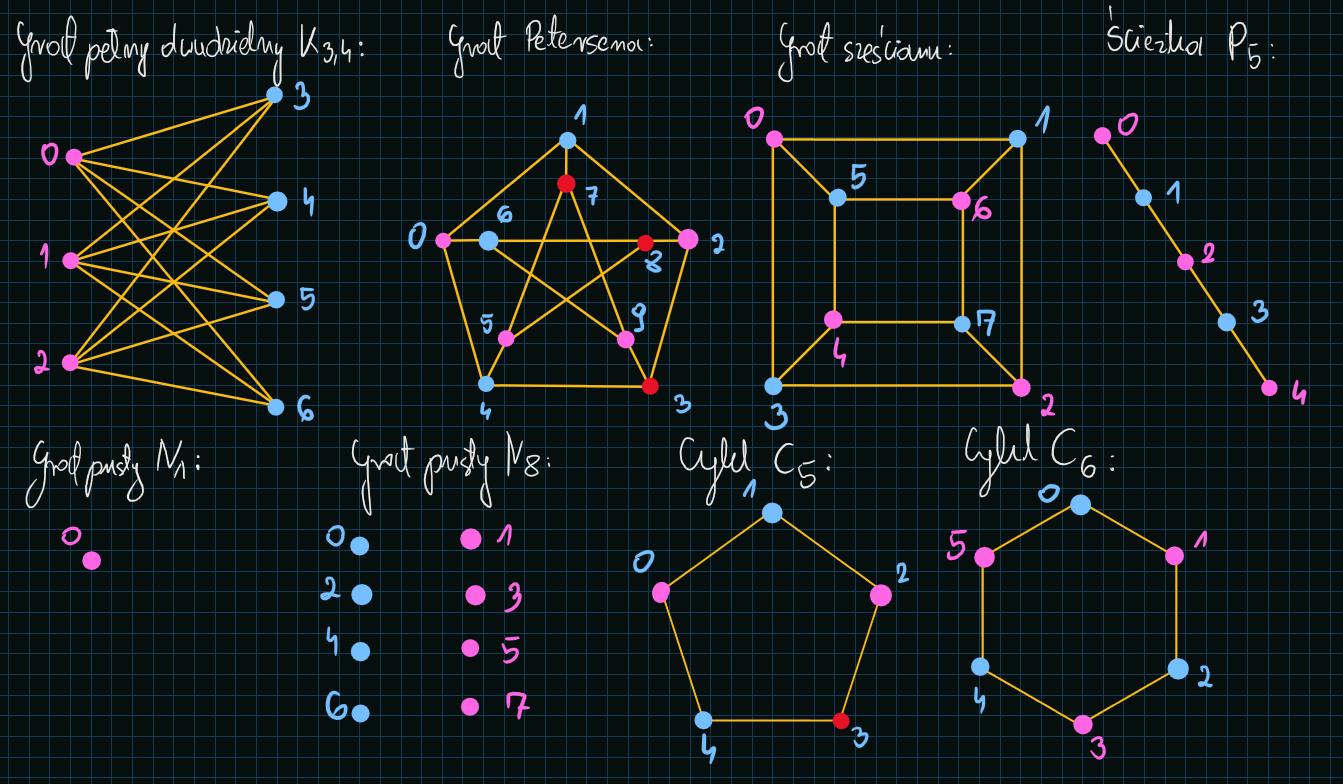

##### Pełny dwudzielny $ K_{3,4} $:

In [3]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[3, 4, 5, 6]
[3, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
3


##### Graf Petersena:

In [4]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 6, 4]
[0, 7, 2]
[1, 8, 3]
[2, 4, 9]
[0, 3, 5]
[4, 8, 7]
[0, 8, 9]
[1, 5, 9]
[2, 6, 5]
[3, 7, 6]
3


##### Graf sześcianu (kostka $ Q_3 $):

In [5]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 3, 5]
[0, 2, 6]
[1, 3, 7]
[2, 0, 4]
[5, 7, 3]
[4, 6, 0]
[5, 7, 1]
[6, 4, 2]
3


##### Ścieżka $ P_5 $:

In [6]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3]
1


##### Ścieżka $ P_6 $:

In [7]:
E = [(i, i + 1) for i in range(5)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4]
1


##### Cykl $ C_5 $:

In [8]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 4]
[0, 2]
[1, 3]
[2, 4]
[3, 0]
2


##### Cykl $ C_6 $:

In [9]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 5]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 0]
2


# Sposób II
### (Szybszy)

### Omówienie algorytmu

Sposób podobny do powyższego. Wystarczy zauważyć jednak, że możemy ustalić źródło w dowolnym wierzchołku grafu (bo to graf nieskierowany) i jedynie wybierać różne ujścia i sprawdzać dla nich maksymalne wartości przepływu. Finalnie wybieramy minimum z tych wartości.

### Złożoność

Zależy od użytego algorytmu znajdowania maksymalnego przepływu oraz sposobu jego wyznaczania. Ja używam Edmondsa-Karpa w implementacji niżej.
###### Obliczeniowa:
$ O(V^2E^2) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [10]:
from queue import Queue


def map_graph(G: 'graph represented by adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
        
    for u in range(n):
        for v in G[u]:
            if u < v:
                G2.append([])
                G2[u].append((w, 1))
                G2[w].append((v, 1))
                w += 1
            else:
                G2[u].append((v, 1))
                    
    return G2


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight

            
def update_flow(flow, parents, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += 1
        flow[u][v] -= 1
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow    = [[0] * n for _ in range(n)]
    parents = [None] * n
    visited = [0] * n
    token   = 1  # Number of iteration to check which vertices have been visited
    
    add_back_edges(G)
    
    while True:
        q = Queue()
        q.put(s)
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u = q.get()
            
            if u == t:
                update_flow(flow, parents, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put(v)
        
        if not found_path: break
        token += 1
        
    return token - 1


def edge_consistency(G: 'undirected unweighted graph represented by adjacency lists'):
    n = len(G)
    result = float('inf')
    u = 0
    for v in range(1, n):
        result = min(result, edmonds_karp(G, u, v))
    return result

###### Kilka testów

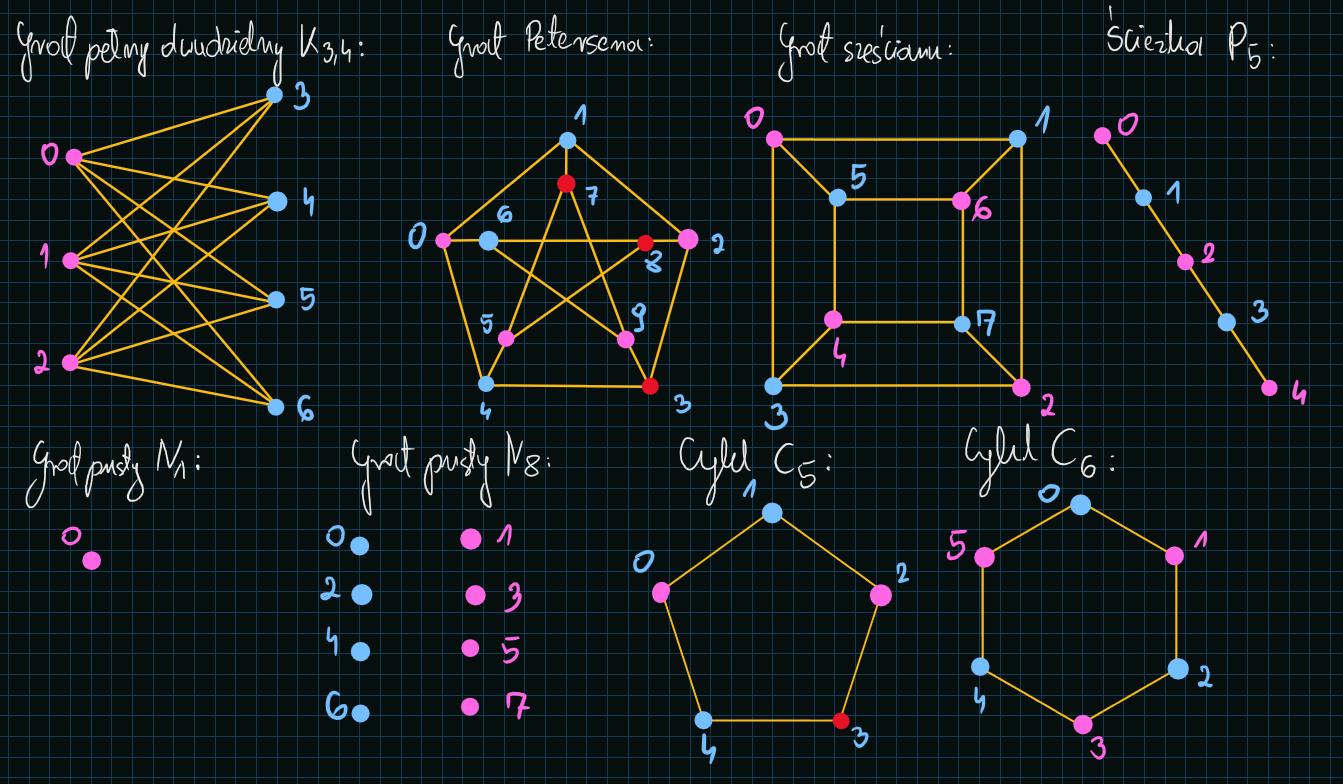

##### Pełny dwudzielny $ K_{3,4} $:

In [11]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[3, 4, 5, 6]
[3, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
3


##### Graf Petersena:

In [12]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 6, 4]
[0, 7, 2]
[1, 8, 3]
[2, 4, 9]
[0, 3, 5]
[4, 8, 7]
[0, 8, 9]
[1, 5, 9]
[2, 6, 5]
[3, 7, 6]
3


##### Graf sześcianu (kostka $ Q_3 $):

In [13]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 3, 5]
[0, 2, 6]
[1, 3, 7]
[2, 0, 4]
[5, 7, 3]
[4, 6, 0]
[5, 7, 1]
[6, 4, 2]
3


##### Ścieżka $ P_5 $:

In [14]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3]
1


##### Ścieżka $ P_6 $:

In [15]:
E = [(i, i + 1) for i in range(5)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4]
1


##### Cykl $ C_5 $:

In [16]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 4]
[0, 2]
[1, 3]
[2, 4]
[3, 0]
2


##### Cykl $ C_6 $:

In [17]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_list(E)

print(*G, sep='\n')
print(edge_consistency(G))

[1, 5]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 0]
2
